# 1. Importing Libaries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
df = pd.read_pickle(r'C:\Users\Charles Yi\A6\02 Data\Prepared\df_cleaned.pkl')

In [4]:
df.shape

(1487, 13)

In [5]:
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990


# 2. Elbow Technique

In [6]:
num_cl = range(1, 10) # defining range of potential clusters

kmeans = [KMeans(n_clusters = i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [14]:
# elminating categorical variales

df_num = df[['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']]

In [15]:
# eliminating null values

df_num.dropna(inplace = True)

C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_22672\2499388642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.dropna(inplace = True)


In [16]:
# checking that null values were dropped

df_num.isnull().sum()

Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
dtype: int64

In [17]:
# checking shape after removal of null values

df_num.shape

# 135 rows removed

(1355, 10)

In [20]:
# creating score that represents rate of variation for each cluster option

score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

score

C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

[-59908.361430493955,
 -16990.00120794953,
 -8615.547668448662,
 -5691.199992366439,
 -4183.809561682951,
 -3464.116146650005,
 -2958.5503927108616,
 -2548.348558551612,
 -2283.0435927549656]

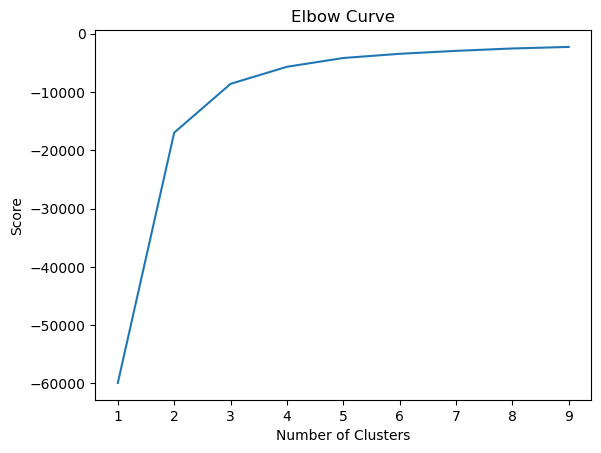

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Observations:** Optimal cluster is three

# 3. K-means Clustering

In [22]:
# creating k-means object

kmeans = KMeans(n_clusters = 3)

In [24]:
# fitting df to kmeans

kmeans.fit(df_num)

C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Charles Yi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_22672\1773540400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [26]:
df_num['clusters'].value_counts()

0    549
1    451
2    355
Name: clusters, dtype: int64

<Axes: xlabel='Log GDP Per Capita', ylabel='Life Ladder'>

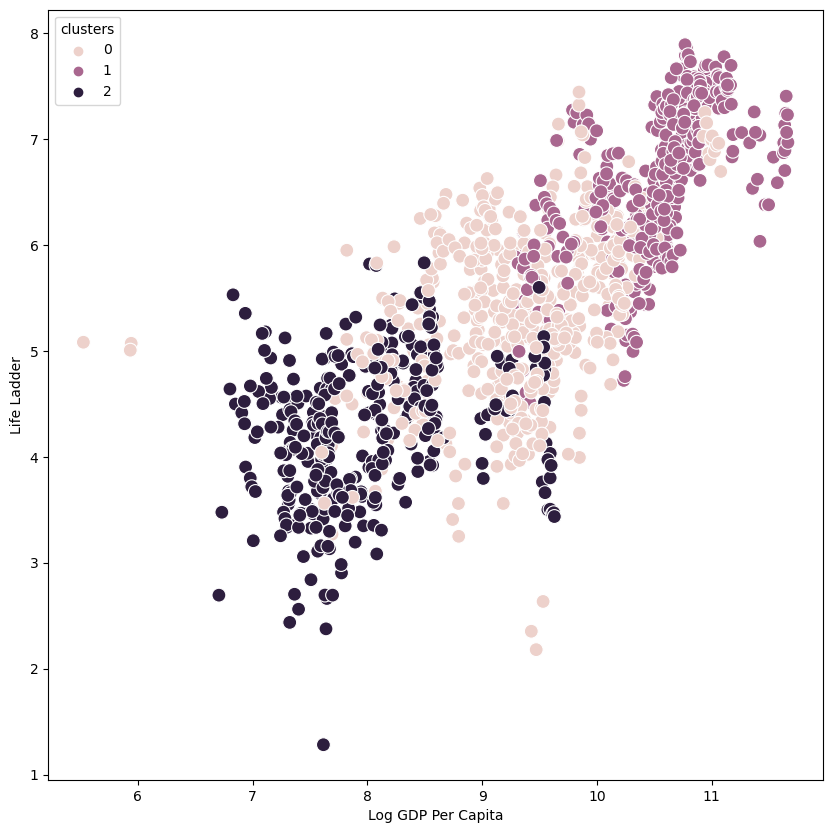

In [27]:
# plotting gdp and life ladder

plt.figure(figsize = (10, 10))
sns.scatterplot(x = df_num['Log GDP Per Capita'], y = df_num['Life Ladder'], hue = df_num['clusters'], s = 100)

<Axes: xlabel='Healthy Life Expectancy At Birth', ylabel='Life Ladder'>

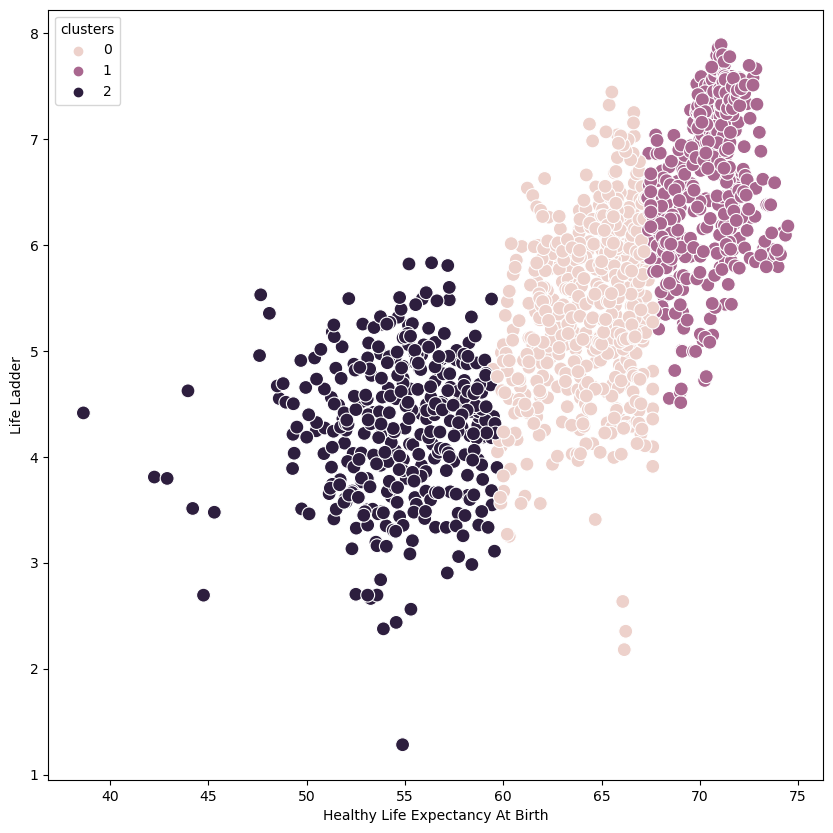

In [28]:
# plotting life ladder and life expectancy

plt.figure(figsize = (10, 10))

sns.scatterplot(x = df_num['Healthy Life Expectancy At Birth'], y = df_num['Life Ladder'], hue = df_num['clusters'], s = 100)

## 3a. Analyzing Cluster Results

In [30]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'Low'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'High'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'Mid'

C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_22672\2871038635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'Low'


In [31]:
df_num.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,clusters,cluster
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,2,Low
5,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847,2,Low
6,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048,2,Low
7,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557,2,Low
8,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990,2,Low


In [32]:
df_num.groupby('cluster').agg({'Log GDP Per Capita':['mean', 'median'], 
                         'Social Support':['mean', 'median'], 
                         'Healthy Life Expectancy At Birth':['mean', 'median'],
                          'Life Ladder':['mean', 'median']})

Log GDP Per Capita            Social Support            \
                      mean     median           mean    median   
cluster                                                          
High             10.510676  10.602811       0.897229  0.914857   
Low               8.025262   7.899697       0.685866  0.691483   
Mid               9.338185   9.380771       0.811401  0.828069   

        Healthy Life Expectancy At Birth         Life Ladder            
                                    mean  median        mean    median  
cluster                                                                 
High                           70.411131  70.625    6.570885  6.606551  
Low                            54.748239  55.020    4.269204  4.313615  
Mid                            64.375164  64.875    5.370509  5.386025

**Findings:** The results are pretty consistent across the board. I divided the clusters by high, mid, and low based on life ladder. Life ladder seems consistently related with gdp, social support, and life expectancy across the clusters. As observed previously, the scatterplots show that variables have a greater effect on life ladder as life ladder increases.

# 4. Fitting a Regression Line Into Clusters

In [ ]:
# sub df with 'high' cluster

df_high = df_num[df_num['cluster'] == 'High']

df_high.head(20)

In [ ]:
# reshaping variables

X = df_high['Log GDP Per Capita'].values.reshape(-1,1)
y = df_high['Life Ladder'].values.reshape(-1,1)

In [ ]:
# creating training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# creating regression object

regression = LinearRegression()

In [ ]:
# fitting regression line

regression.fit(X_train, y_train)

In [ ]:
# predicting y with regression

predict_y = regression.predict(X_test)

In [ ]:
# plotting regression line and predicted y

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, predict_y, color='red', linewidth =3)
plot_test.title('Life Ladder / Log GDP Per Capita (Test set)')
plot_test.xlabel('Log GDP Per Capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, predict_y) # This is the mean squared error
r2 = r2_score(y_test, predict_y) # This is the R2 score. 

In [ ]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

**Findings:** Interestingly, r2 score is lower for this regression line then the regression line for the entire df created in last assignment. However, rmse is lower. So while the observations are closer to the regression line in this model (according to lower rmse), the model is is a poorer fit (according to lower r2 score).

# 5. Merging and Exporting

In [33]:
# exporting df_num

df_num.to_csv(r'C:\Users\Charles Yi\A6\02 Data\Prepared\df_num.csv')

In [51]:
df_cluster = df.merge(df_num, on = ['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Confidence In National Government', 'Negative Affect', 'Positive Affect'])

In [52]:
df_cluster.to_csv(r'C:\Users\Charles Yi\A6\02 Data\Prepared\df_cluster.csv')

In [53]:
df_cluster.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,clusters,cluster
0,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,2,Low
1,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847,2,Low
2,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048,2,Low
3,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557,2,Low
4,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990,2,Low
